In [14]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
data = pd.read_csv('supermarket_sales.csv')

In [15]:
warnings.simplefilter('ignore')

In [16]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [17]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [19]:
# check for duplicates
data.duplicated(subset='Invoice ID', keep=False).sum()

0

In [20]:
category_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
date_cols = ['Date', 'Time']

# Convert category columns to category type
for col in category_cols:
    data[col] = data[col].astype('category')

# Convert date columns to datetime
for col in date_cols:
    data[col] = pd.to_datetime(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   category      
 2   City                     1000 non-null   category      
 3   Customer type            1000 non-null   category      
 4   Gender                   1000 non-null   category      
 5   Product line             1000 non-null   category      
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [21]:
data.drop('Invoice ID', axis=1, inplace=True)

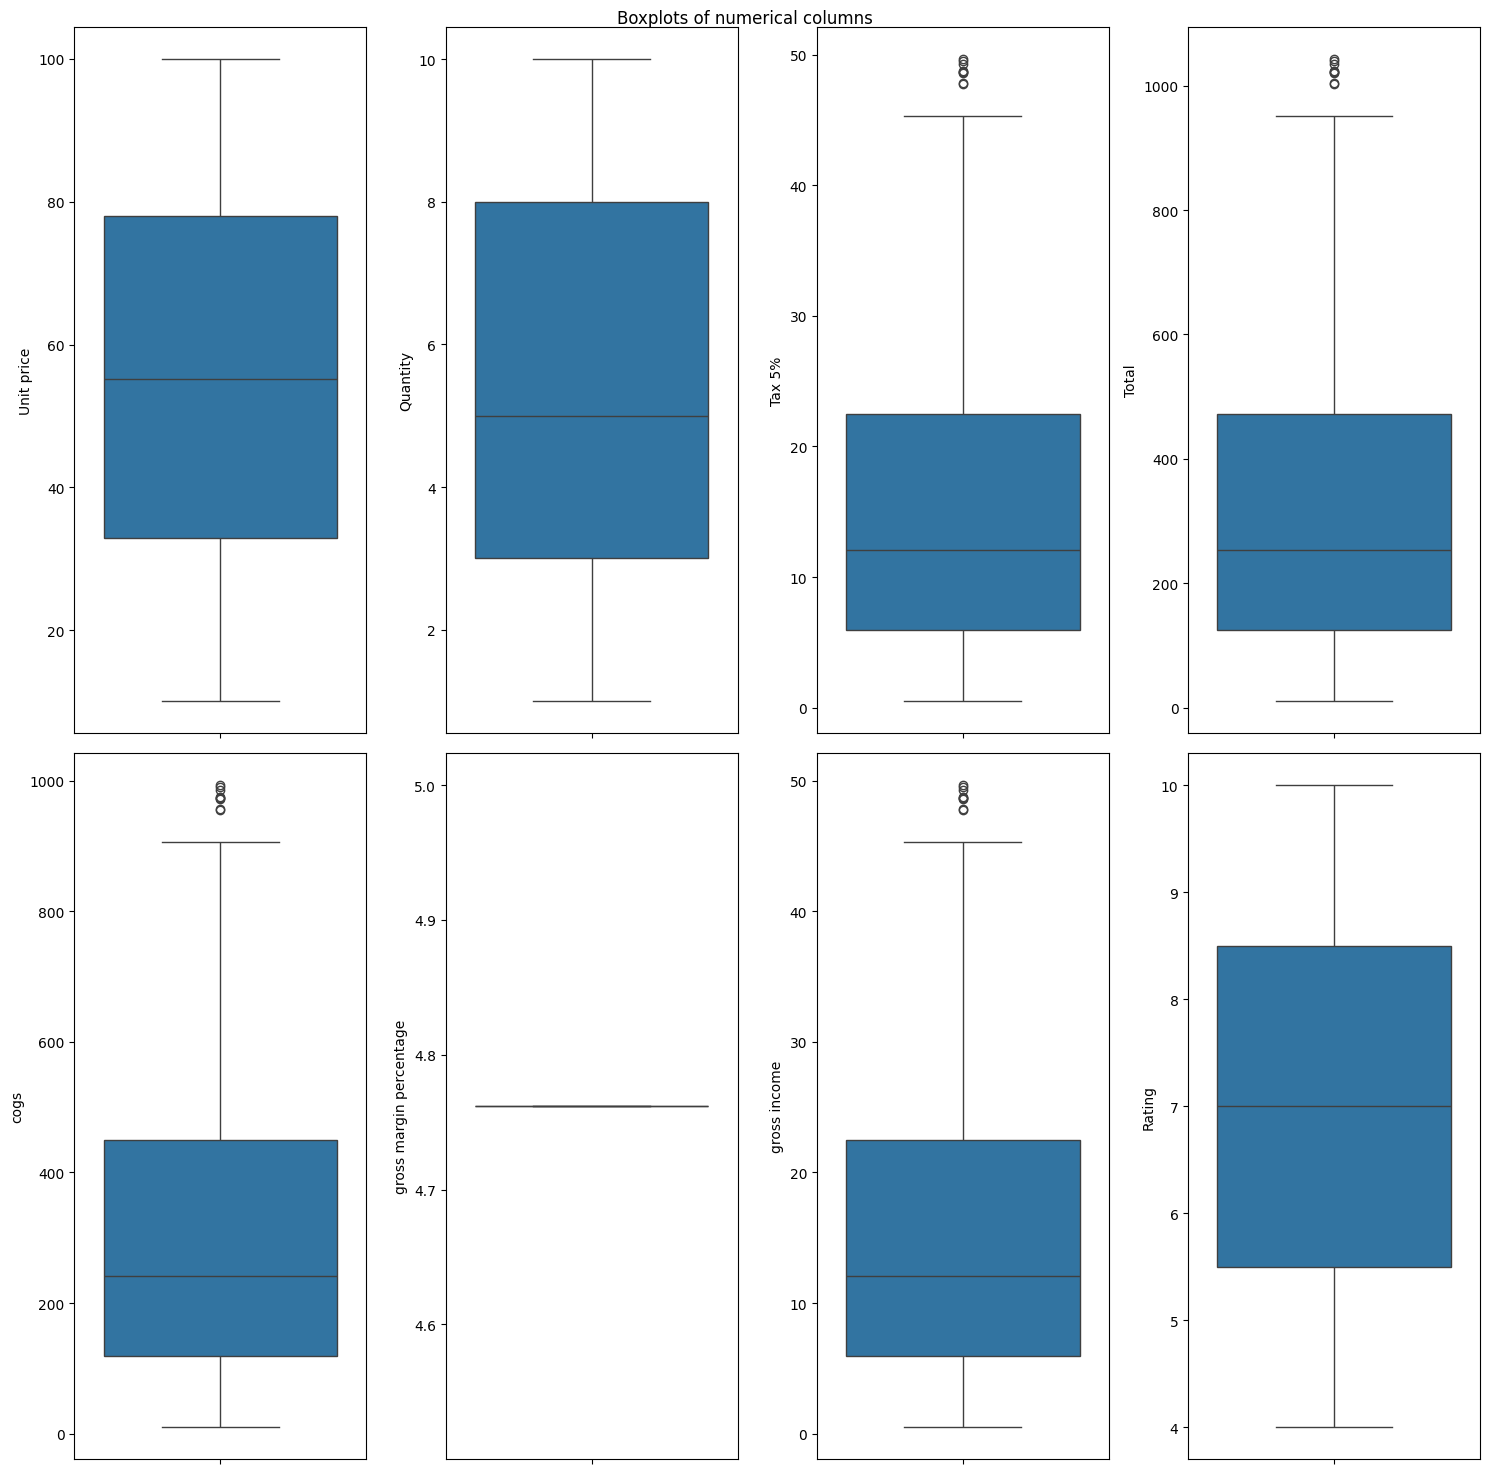

In [22]:
# check for outliers
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
fig, axes = plt.subplots(2, 4, figsize=(15, 15))
fig.suptitle('Boxplots of numerical columns')
for i, col in enumerate(numerical_cols):
    sns.boxplot(data[col], ax=axes[i//4, i%4])

plt.tight_layout()


it seems that gross margin precentage appears to be stable 4.76% for all products

In [23]:
data.describe(include='all')

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,3,3,2,2,6,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,NaN,NaN,Ewallet,NaN,NaN,NaN,NaN
freq,340,340,501,501,178,NaN,NaN,NaN,NaN,NaN,NaN,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,2024-03-10 15:24:41.880000,NaN,307.58738,4.761905,15.379369,6.97270
min,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2024-03-10 10:00:00,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,2024-03-10 12:43:00,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,2024-03-10 15:19:00,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,2024-03-10 18:15:00,NaN,448.90500,4.761905,22.445250,8.50000
max,NaN,NaN,NaN,NaN,NaN,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,2024-03-10 20:59:00,NaN,993.00000,4.761905,49.650000,10.00000


In [24]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-03-10 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-03-10 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-03-10 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-03-10 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-03-10 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


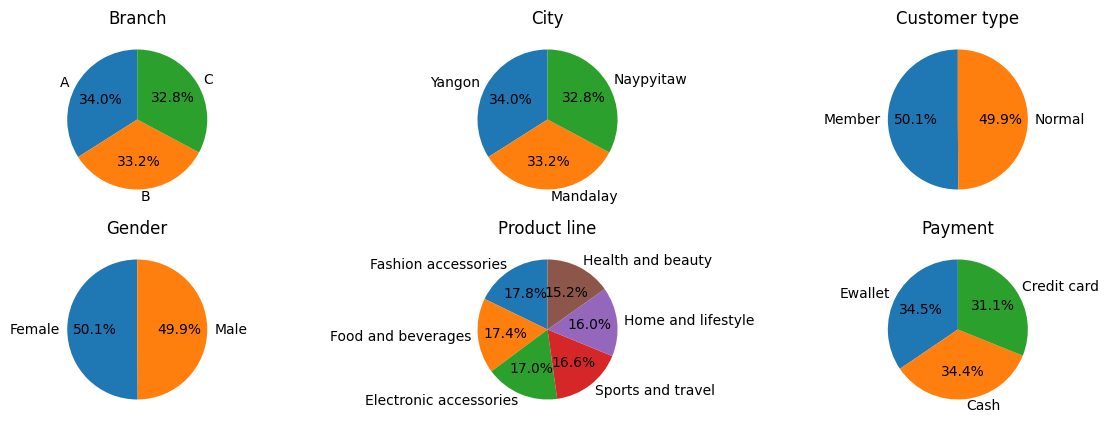

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

for i, col in enumerate(category_cols):
    values = data[col].value_counts()
    labels = values.index
    sizes = values.values
    ax = axes[i//3, i%3]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(col)

Almost equal distribution of categories in all columns

# Male vs Female 

<Axes: xlabel='Total'>

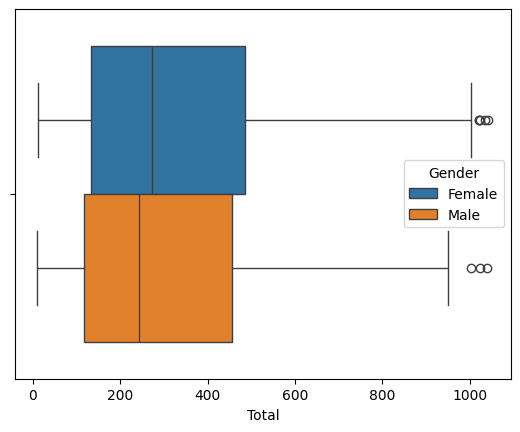

In [26]:
sns.boxplot(data=data, x='Total', hue='Gender')

<Axes: xlabel='Total', ylabel='Quantity'>

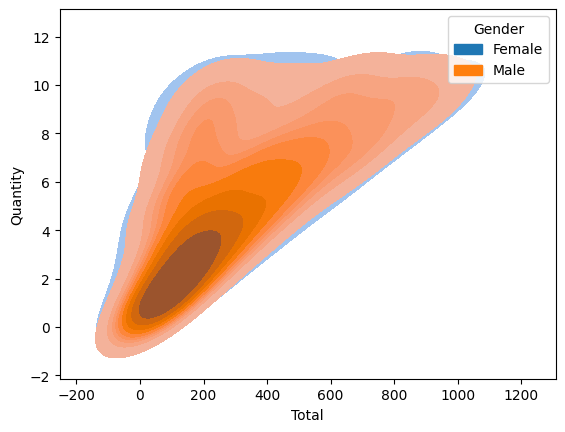

In [27]:
sns.kdeplot(data=data, x='Total', y='Quantity', hue='Gender', fill=True)

Almost Male or Female customers spend the same amount of money

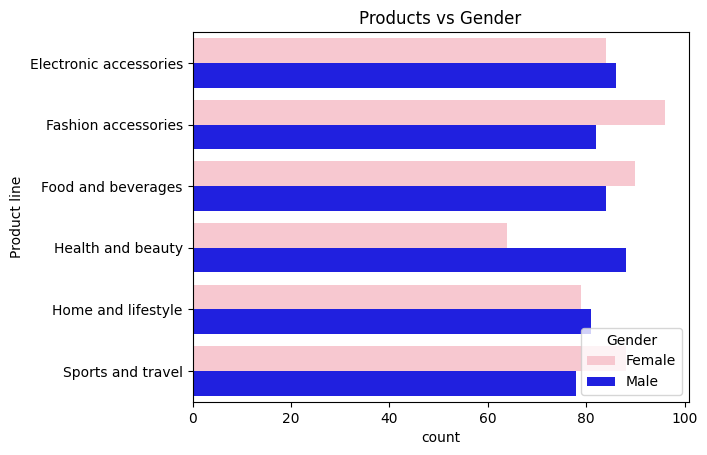

In [28]:
sns.countplot(data=data, y='Product line', hue='Gender', palette=['pink', 'blue'])
plt.title('Products vs Gender')
plt.show()


* Unexpectedly, the Male customers spent on Health and beauty products more than the Female customers
* Otherwise, the spending on other product lines is almost the same for Male and Female customers

# Time Analysis

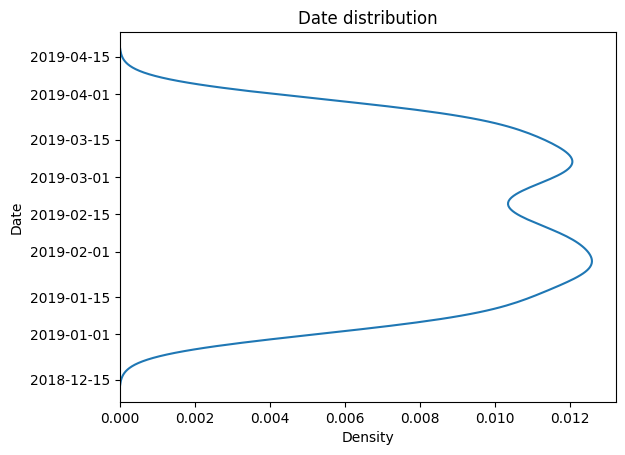

In [29]:
sns.kdeplot(data=data, y='Date')
plt.title('Date distribution')
plt.show()

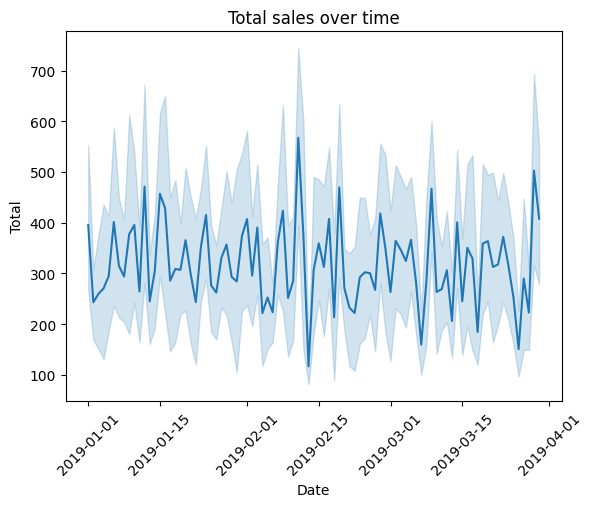

In [30]:
sns.lineplot(data=data, x='Date', y='Total')
plt.xticks(rotation=45)
plt.title('Total sales over time')
plt.show()

It seems that, we had unexpected drop in sales during the first half of February

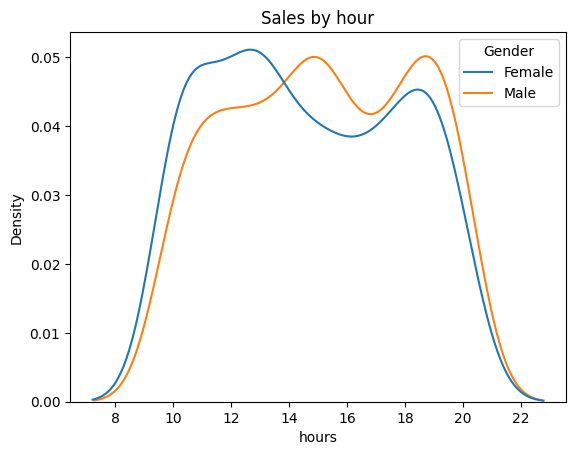

In [31]:
data['hours'] = data['Time'].dt.hour
sns.kdeplot(data=data, x='hours', hue='Gender')
plt.title('Sales by hour')
plt.show()

Most women buy in the afternoon, unlike men who buy more at night

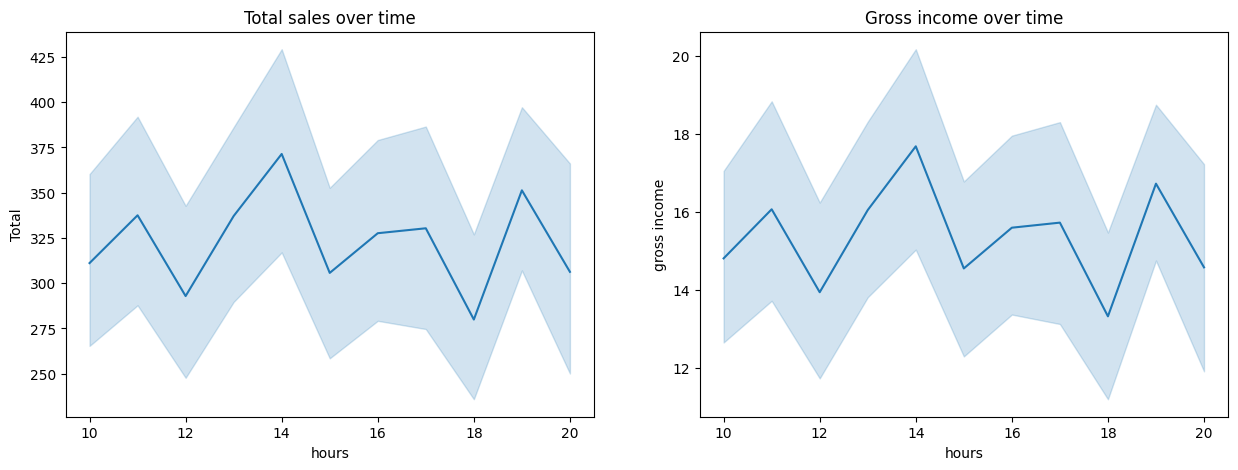

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=data, x='hours', y='Total', ax=ax[0])
sns.lineplot(data=data, x='hours', y='gross income', ax=ax[1])
ax[0].set_title('Total sales over time')
ax[1].set_title('Gross income over time')
plt.show()

This confirm to us that the peak hours in the supermarket are 2 PM and 7 PM

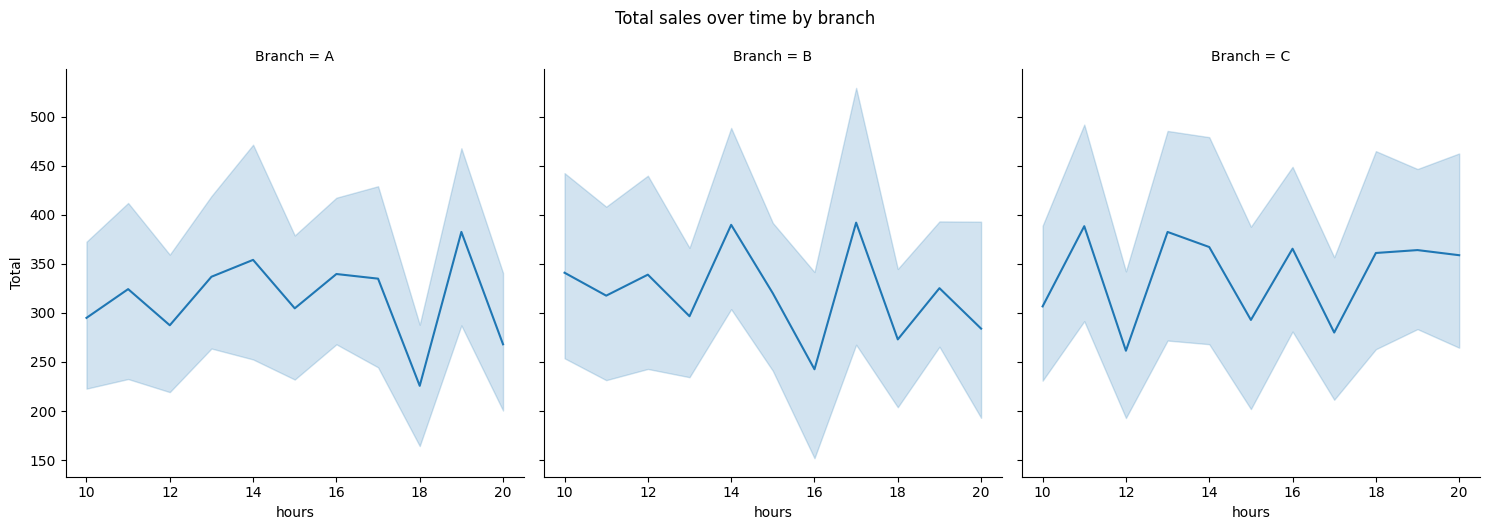

In [33]:
g = sns.relplot(data=data, x='hours', y='Total', kind='line', col='Branch')
g.figure.suptitle('Total sales over time by branch', y=1.05)
plt.show()

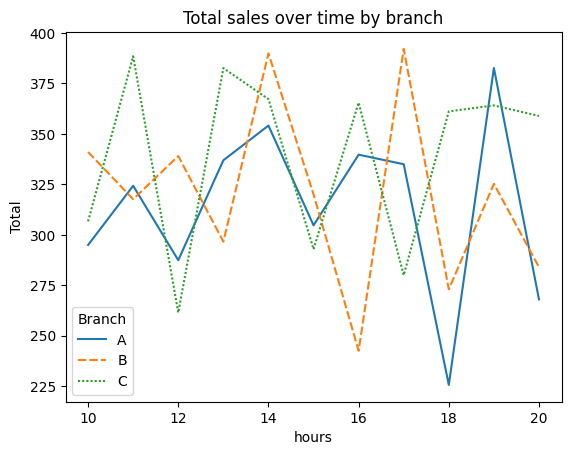

In [34]:
sns.lineplot(data=data, x='hours', y='Total', hue='Branch',style='Branch', errorbar=None)
plt.title('Total sales over time by branch')
plt.show()

We have some diffreces in the peak hours between the branches. "**Branch A**" has the highest sales at 7pm but, **"Branch B"** at 5pm and 2pm

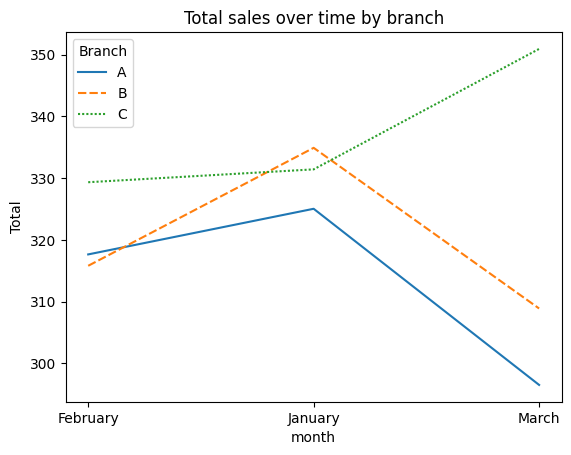

In [47]:
data['month'] = data['Date'].dt.month_name()

# Sort the data by month
data.sort_values(by='month', inplace=True)

sns.lineplot(data=data, x='month', y='Total', hue='Branch', style='Branch', errorbar=None)
plt.title('Total sales over time by branch')
plt.show()

Unlike the other two branches, "**branch C**" has a significant increase in sales in March

# Products analysis

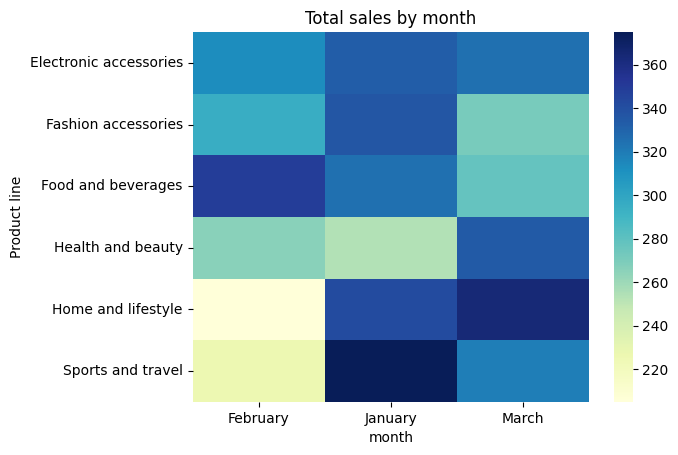

In [36]:
sum_byMonth = data.groupby(['Product line', 'month'], observed=False)['Quantity'].sum()
sum_byMonth = sum_byMonth.unstack().fillna(0)

sns.heatmap(data=sum_byMonth, cmap='YlGnBu')
plt.title('Total sales by month')
plt.show()

it seems that we had a high drop in sales in February at **Sports and travel**, **Home and lifestyle**, and **Health and beauty**.


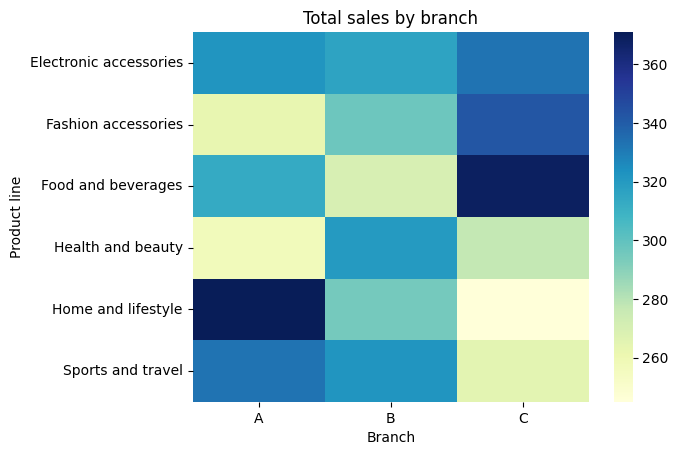

In [207]:
sum_byBranch = data.groupby(['Product line', 'Branch'], observed=False)['Quantity'].sum()
sum_byBranch = sum_byBranch.unstack().fillna(0)

sns.heatmap(data=sum_byBranch, cmap='YlGnBu')
plt.title('Total sales by branch')
plt.show()

* *Branch A* has the highest sales in **Home and lifestyle**, **Electronic accessories**
* *Branch C* has the highest sales in **Food and beverages**, **Fashion accessories**. In contrast, it has the lowest sales in **Sports and travel**, **Home and lifestyle**, and **Health and beauty**

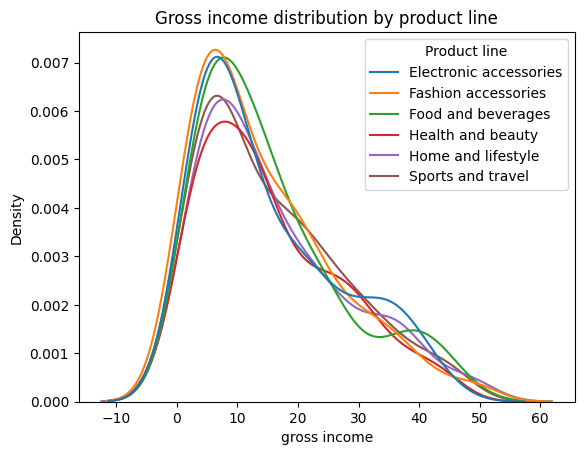

In [206]:
sns.kdeplot(data=data, x='gross income', hue='Product line')
plt.title('Gross income distribution by product line')
plt.show()

Most of income comes from Fashion accessories. In contrast, Health and beauty is the lowest

# Branches analysis

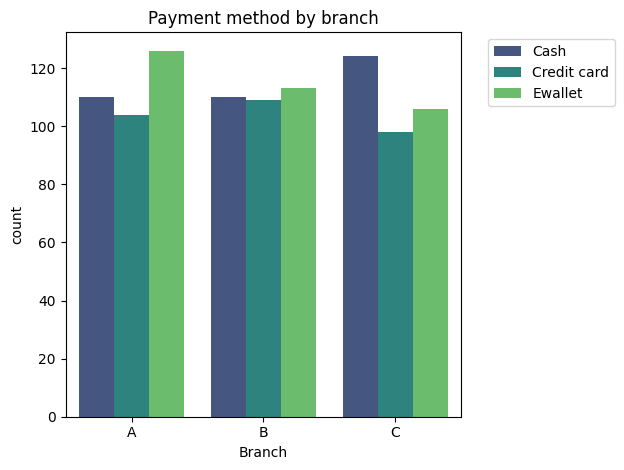

In [46]:
sns.countplot(data=data, x='Branch', hue='Payment', palette='viridis')
plt.title('Payment method by branch')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

the payments in branch A are mostly done by Ewallet, while in branch C, the payments are mostly done by cash.

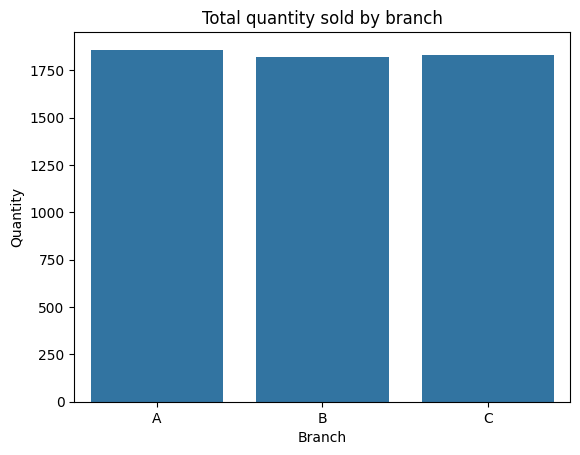

In [205]:
quantities = data.groupby('Branch', observed=False).sum('Quantity').sort_values(by='Rating')
sns.barplot(x=quantities.index, y=quantities['Quantity'])
plt.title('Total quantity sold by branch')
plt.show()

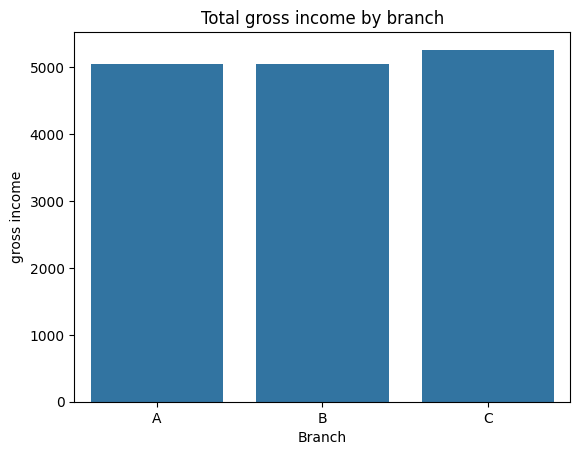

In [204]:
sum_of_sales = data.groupby('Branch', observed=False).sum('gross income').sort_values(by='gross income')
sns.barplot(data=sum_of_sales, x=sum_of_sales.index, y='gross income')
plt.title('Total gross income by branch')
plt.show()